In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam


img_width, img_height = 224, 224

NUM_EPOCHS = 10
batchsize = 8
num_train_images = 480
num_val_images = 120

base_model = ResNet50V2(weights='imagenet', 
                      include_top=False, 
                      input_shape=(img_height, img_width, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# set train and validation image.
train_dir = '/content/drive/My Drive/dataset'


train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      validation_split=0.2
    )


train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize,
                                                    class_mode='binary',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize,
                                                    class_mode='binary',
                                                    subset='validation')

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:

#This function will build final model, re-train base model.
def build_final_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    
    
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    final_model = Model(inputs=base_model.input, outputs=predictions)

    return final_model

class_list = ["nonbatik", "batik"]
FC_LAYERS = [1024, 1024]
dropout = 0.3

final_model = build_final_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))

In [ ]:
adam = Adam(lr=0.00001)
final_model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

history = final_model.fit(train_generator, epochs=NUM_EPOCHS, workers=0, 
                                       steps_per_epoch=num_train_images // batchsize, 
                                       shuffle=True, validation_data=val_generator,
        validation_steps=num_val_images // batchsize)

Epoch 1/10
60/60 [==============================] - 210s 3s/step - loss: 0.8088 - accuracy: 0.4900 - val_loss: 0.7203 - val_accuracy: 0.5333
Epoch 2/10
60/60 [==============================] - 111s 2s/step - loss: 0.8038 - accuracy: 0.4967 - val_loss: 0.7122 - val_accuracy: 0.4267
Epoch 3/10
60/60 [==============================] - 76s 1s/step - loss: 0.7899 - accuracy: 0.5233 - val_loss: 0.7062 - val_accuracy: 0.4000
Epoch 4/10
60/60 [==============================] - 60s 999ms/step - loss: 0.7824 - accuracy: 0.5100 - val_loss: 0.7152 - val_accuracy: 0.5333
Epoch 5/10
60/60 [==============================] - 59s 981ms/step - loss: 0.7792 - accuracy: 0.5167 - val_loss: 0.7128 - val_accuracy: 0.4667
Epoch 6/10
60/60 [==============================] - 56s 933ms/step - loss: 0.7764 - accuracy: 0.5100 - val_loss: 0.7094 - val_accuracy: 0.4400
Epoch 7/10
60/60 [==============================] - 56s 939ms/step - loss: 0.7774 - accuracy: 0.4267 - val_loss: 0.7128 - val_accuracy: 0.5200
Epoch 

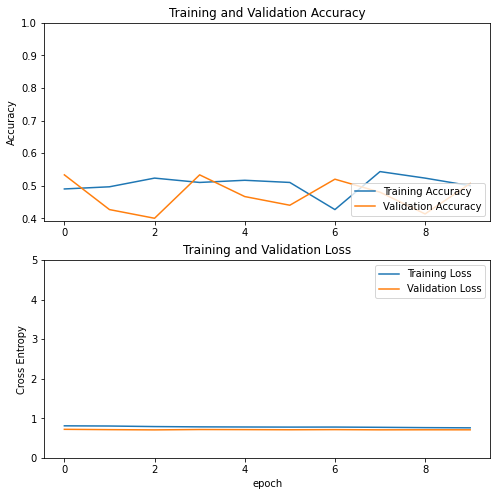

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### change img_path with input path of image that you want to search

In [ ]:
from keras.preprocessing import image
import numpy as np
img_path ='/content/drive/My Drive/Batik300/B9/B9_4.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data1 = preprocess_input(img_data)

pretrained_feature = final_model.predict(img_data,verbose=0)
pretrained_feature_np = np.array(pretrained_feature)
pretrained_feature1D = pretrained_feature_np.flatten()

pretrained_feature_base = base_model.predict(img_data1)
pretrained_feature_np_base = np.array(pretrained_feature_base)
pretrained_feature1D_base = pretrained_feature_np_base.flatten()

y_prob = final_model.predict(img_data)

y_classes = y_prob.argmax(axis=-1)

print(pretrained_feature1D, pretrained_feature1D, y_classes)

[0.4715951  0.52840495] [1]


In [ ]:
def checkall(img_path):
  img = image.load_img(img_path, target_size=(img_width, img_height))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data1 = preprocess_input(img_data)

  pretrained_feature = final_model.predict(img_data,verbose=0)
  pretrained_feature_np = np.array(pretrained_feature)
  pretrained_feature1D = pretrained_feature_np.flatten()

  pretrained_feature_base = base_model.predict(img_data1)
  pretrained_feature_np_base = np.array(pretrained_feature_base)
  pretrained_feature1D_base = pretrained_feature_np_base.flatten()

  y_prob = final_model.predict(img_data)
  y_classes = y_prob.argmax(axis=-1)

  # print(pretrained_feature1D)
  print(y_classes, img_path)

### Save model

In [ ]:
 final_model.save('/content/drive/My Drive/bangkitmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/bangkitmodel/assets


### Check all images class

In [ ]:
import os
#Check all batik image and get class. T
for subdir, dirs, files in os.walk('/content/drive/My Drive/dataset/batik_300'):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".jpg"):
            checkall(filepath)

[1] /content/drive/My Drive/dataset/batik_300/B1_1.jpg
[1] /content/drive/My Drive/dataset/batik_300/B1_2.jpg
[1] /content/drive/My Drive/dataset/batik_300/B1_3.jpg
[1] /content/drive/My Drive/dataset/batik_300/B1_4.jpg
[1] /content/drive/My Drive/dataset/batik_300/B1_5.jpg
[1] /content/drive/My Drive/dataset/batik_300/B1_6.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_1.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_2.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_3.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_4.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_5.jpg
[1] /content/drive/My Drive/dataset/batik_300/B2_6.jpg
[1] /content/drive/My Drive/dataset/batik_300/B3_1.jpg
[1] /content/drive/My Drive/dataset/batik_300/B3_2.jpg
[1] /content/drive/My Drive/dataset/batik_300/B3_3.jpg
[0] /content/drive/My Drive/dataset/batik_300/B3_4.jpg
[1] /content/drive/My Drive/dataset/batik_300/B3_5.jpg
[0] /content/drive/My Drive/dataset/batik_300/B3_6.jpg
[0] /conte

Some image get wrong prediction



### Here we try to search image utilizing final model vector encoded

In [ ]:
import os
from scipy.spatial import distance as dist
from sklearn.metrics.pairwise import cosine_similarity

# Below shows the full path for test images, adjust it for your specific path.
# Here I force all class to same batik image collection path.
if y_classes == [0]:
  path = '/content/drive/My Drive/batik/test/batik'
elif y_classes == [1]:
  path = '/content/drive/My Drive/batik/test/batik'
    
mindist=10000
maxcosine =0
i=0
for filename in os.listdir(path):
    image_train = os.path.join(path, filename)
    i +=1
    imgtrain = image.load_img(image_train, target_size=(img_width, img_height))
    img_data_train = image.img_to_array(imgtrain)
    img_data_train = np.expand_dims(img_data_train, axis=0)
    img_data_train = preprocess_input(img_data_train)

    pretrained_feature_train = base_model.predict(img_data_train)
    pretrained_feature_np_train = np.array(pretrained_feature_train)
    pretrained_feature_train1D = pretrained_feature_np_train.flatten()
    eucldist = dist.euclidean(pretrained_feature1D_base,pretrained_feature_train1D)
    
    if mindist > eucldist:
        mindist=eucldist
        minfilename = filename
    
    dot_product = np.dot(pretrained_feature1D_base,pretrained_feature_train1D)
    norm_Y = np.linalg.norm(pretrained_feature1D_base)
    norm_X = np.linalg.norm(pretrained_feature_train1D)
    cosine_similarity = dot_product / (norm_X * norm_Y)
    
    if maxcosine < cosine_similarity:
        maxcosine=cosine_similarity
        cosfilename = filename
    
    
    print ("%s filename %f euclediandist %f cosine_similarity" %(filename,eucldist,cosine_similarity))
    print ("%s minfilename %f mineuclediandist %s cosfilename %f maxcosinesimilarity" %(minfilename,mindist, cosfilename, maxcosine))


B1_6.jpg filename 280.663361 euclediandist 0.498013 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcosinesimilarity
B2_4.jpg filename 433.536713 euclediandist 0.143169 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcosinesimilarity
B3_3.jpg filename 359.705780 euclediandist 0.226134 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcosinesimilarity
B4_4.jpg filename 359.566467 euclediandist 0.316729 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcosinesimilarity
B5_3.jpg filename 363.243927 euclediandist 0.145032 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcosinesimilarity
B6_5.jpg filename 360.387573 euclediandist 0.293408 cosine_similarity
B1_6.jpg minfilename 280.663361 mineuclediandist B1_6.jpg cosfilename 0.498013 maxcos

### Print Similar Images

/content/drive/My Drive/batik/test/batik/B9_4.jpg
/content/drive/My Drive/batik/test/batik/B9_4.jpg


Text(0.5, 1.0, 'Cosine_Similarity 1.0000000')

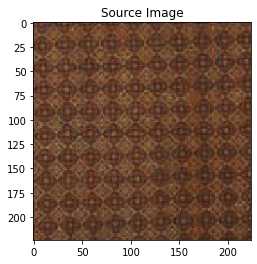

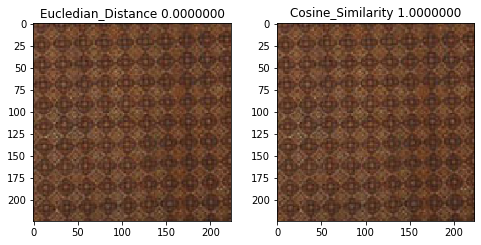

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_result = os.path.join(path, minfilename)
imgresult = image.load_img(image_train, target_size=(224, 224))
plt.imshow(img)
plt.title("Source Image")

fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
image_result1 = os.path.join(path, minfilename)
print(image_result1)
imgresult1 = image.load_img(image_result1, target_size=(224, 224))
plt.imshow(imgresult1)
eucledian5d ="%.7f" % mindist
plt.title("Eucledian_Distance " + str(eucledian5d))

fig.add_subplot(2,2,2)
image_result2 = os.path.join(path, cosfilename)
print(image_result2)
imgresult2 = image.load_img(image_result2, target_size=(224, 224))
plt.imshow(imgresult2)
cosine5d ="%.7f" % maxcosine
plt.title("Cosine_Similarity " + str(cosine5d))